## **Algoritmo K-means (Core)**

El algoritmo K-means es uno de los métodos de agrupamiento más utilizados en análisis de datos y machine learning. Este algoritmo busca agrupar un conjunto de datos en K grupos o clusters, donde cada grupo está definido por un centroide. En esta actividad, utilizaremos el algoritmo K-means para analizar y segmentar clientes en función de su comportamiento de compra, utilizando el dataset «Mall Customer Segmentation Data» de Kaggle.

Enlace al dataset: https://www.kaggle.com/vjchoudhary7/customer-segmentation-tutorial-in-python



**Objetivo de la Actividad**

El objetivo de esta actividad es utilizar el algoritmo K-means para identificar diferentes grupos de clientes según su comportamiento de compra. El análisis de los clusters resultantes permitirá obtener una mejor comprensión de las características de los clientes, lo que puede ser útil para personalizar estrategias de marketing y mejorar la experiencia del cliente.



**Descripción del Algoritmo K-means**

K-means es un algoritmo de aprendizaje no supervisado que agrupa datos en K clusters o grupos, donde K es un número predefinido. Cada cluster se representa mediante un centroide, que es el promedio de todos los puntos de datos en ese grupo. El algoritmo tiene dos fases principales:

* 1. Asignación de clusters: Cada punto de datos se asigna al centroide más cercano.
* 2. Actualización de centroides: Se recalcula la posición de los centroides basándose en la media de los puntos de datos asignados a cada cluster.

Este proceso se repite hasta que los centroides no cambian significativamente o se alcanza un número máximo de iteraciones.




| **Column**                   | **Data Type** | **Non-Null Count** | **Description**                                          |
|------------------------------|---------------|--------------------|----------------------------------------------------------|
| **CustomerID**                | int64         | 200                | Unique identifier for each customer.                     |
| **Gender**                    | object        | 200                | Gender of the customer (e.g., "Male", "Female").         |
| **Age**                        | int64         | 200                | Age of the customer.                                     |
| **Annual Income (k$)**        | int64         | 200                | Annual income of the customer, in thousands of dollars.  |
| **Spending Score (1-100)**    | int64         | 200                | Spending score of the customer, on a scale from 1 to 100. |

### DataFrame Summary:
- **Total Rows:** 200
- **Total Columns:** 5
- **Data Types:** 4 columns of `int64` and 1 column of `object`.
- **Memory Usage:** 7.9 KB
- **Missing Values:** No missing values in any column.


**Carga del Dataset:**
* El dataset contiene información sobre clientes de un centro comercial, como su género, edad, ingresos anuales y puntaje de gasto.
* Utiliza el archivo «Mall_Customers.csv» y cárgalo en tu entorno de trabajo.


**Instrucciones**

In [1]:
import pandas as pd

In [3]:
# Cargar el archivo CSV
file_path = "../data/Mall_Customers.csv"  # Cambia esto a la ruta de tu archivo
df = pd.read_csv(file_path)

# Examinar las primeras filas del dataset
print("Primeras filas del dataset:")
print(df.head())

Primeras filas del dataset:
   CustomerID  Gender  Age  Annual Income (k$)  Spending Score (1-100)
0           1    Male   19                  15                      39
1           2    Male   21                  15                      81
2           3  Female   20                  16                       6
3           4  Female   23                  16                      77
4           5  Female   31                  17                      40


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   CustomerID              200 non-null    int64 
 1   Gender                  200 non-null    object
 2   Age                     200 non-null    int64 
 3   Annual Income (k$)      200 non-null    int64 
 4   Spending Score (1-100)  200 non-null    int64 
dtypes: int64(4), object(1)
memory usage: 7.9+ KB


In [5]:
df.describe()

,CustomerID,Age,Annual Income (k$),Spending Score (1-100)
count,200.000000,200.000000,200.000000,200.000000
mean,100.500000,38.850000,60.560000,50.200000
std,57.879185,13.969007,26.264721,25.823522
min,1.000000,18.000000,15.000000,1.000000
25%,50.750000,28.750000,41.500000,34.750000
50%,100.500000,36.000000,61.500000,50.000000
75%,150.250000,49.000000,78.000000,73.000000
max,200.000000,70.000000,137.000000,99.000000


In [6]:
# Verificar las variables químicas que afectan la calidad del vino
print("\nColumnas del dataset:")
print(df.columns)


Columnas del dataset:
Index(['CustomerID', 'Gender', 'Age', 'Annual Income (k$)',
       'Spending Score (1-100)'],
      dtype='object')



Valores únicos en Gender:
Gender
Female    112
Male       88
Name: count, dtype: int64


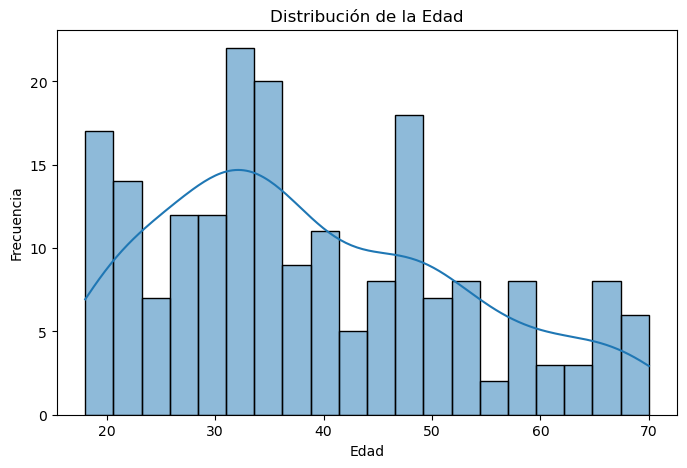

C:\Users\user\AppData\Local\Temp\ipykernel_17768\946293503.py:20: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df, x='Gender', y='Spending Score (1-100)', palette='Set2')


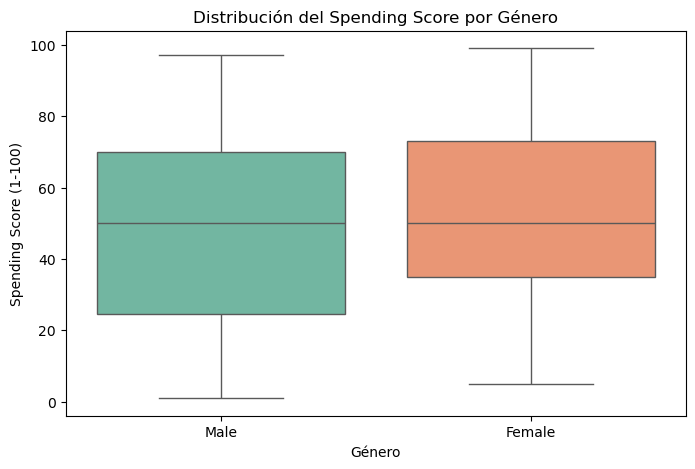

C:\Users\user\AppData\Local\Temp\ipykernel_17768\946293503.py:28: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df, x='Annual Income (k$)', y='Spending Score (1-100)', palette='Set3')


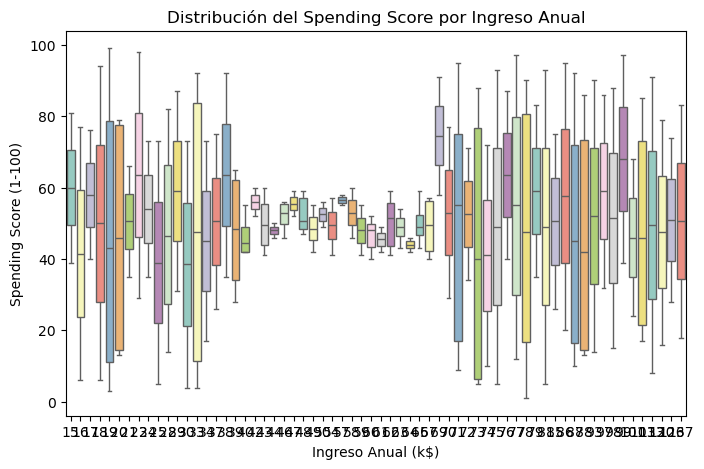

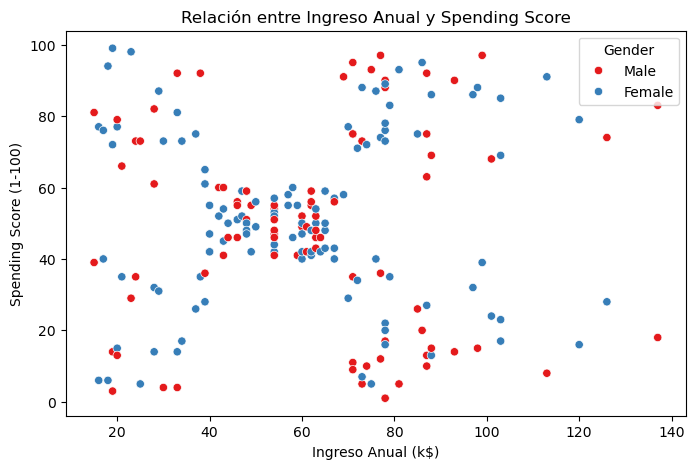

In [10]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
# Exploración de variables categóricas
categorical_columns = ['Gender']
for col in categorical_columns:
    print(f"\nValores únicos en {col}:")
    print(df[col].value_counts())

# Distribución de la edad
plt.figure(figsize=(8, 5))
sns.histplot(df['Age'].dropna(), bins=20, kde=True)
plt.title("Distribución de la Edad")
plt.xlabel("Edad")
plt.ylabel("Frecuencia")
plt.show()

# Comparación de Spending Score por género
plt.figure(figsize=(8, 5))
sns.boxplot(data=df, x='Gender', y='Spending Score (1-100)', palette='Set2')
plt.title("Distribución del Spending Score por Género")
plt.xlabel("Género")
plt.ylabel("Spending Score (1-100)")
plt.show()

# Comparación de Spending Score por grupo de ingresos
plt.figure(figsize=(8, 5))
sns.boxplot(data=df, x='Annual Income (k$)', y='Spending Score (1-100)', palette='Set3')
plt.title("Distribución del Spending Score por Ingreso Anual")
plt.xlabel("Ingreso Anual (k$)")
plt.ylabel("Spending Score (1-100)")
plt.show()

# Relación entre Ingreso Anual y Spending Score
plt.figure(figsize=(8, 5))
sns.scatterplot(data=df, x='Annual Income (k$)', y='Spending Score (1-100)', hue='Gender', palette='Set1')
plt.title("Relación entre Ingreso Anual y Spending Score")
plt.xlabel("Ingreso Anual (k$)")
plt.ylabel("Spending Score (1-100)")
plt.show()


**Descripción de los Resultados:**
* Ingreso Anual tiene un promedio de 60.56k$, con una desviación estándar de 26.26k$. Los ingresos oscilan entre 15k$ y 137k$.
* Puntaje de Gasto tiene una media de 50.20, con una desviación estándar de 25.82. El puntaje varía entre 1 y 99.
* Los histogramas generados visualizan la distribución de estas variables en el conjunto de datos, permitiendo ver su dispersión y la tendencia central de ambos atributos.


**Selección de Variables:**
* Para este análisis, selecciona las variables ‘Annual Income (k$)’ y ‘Spending Score (1-100)’, ya que representan características importantes relacionadas con el comportamiento de compra.

**Implementación de K-means:**
* Aplica el algoritmo K-means utilizando diferentes valores de K (por ejemplo, K = 3, 4, 5) y observa cómo se agrupan los clientes.
* Visualiza los resultados utilizando gráficos de dispersión que representen los clusters y los centroides.

c:\Users\user\.conda\envs\bootcamp_mitic\Lib\site-packages\sklearn\cluster\_kmeans.py:1429: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


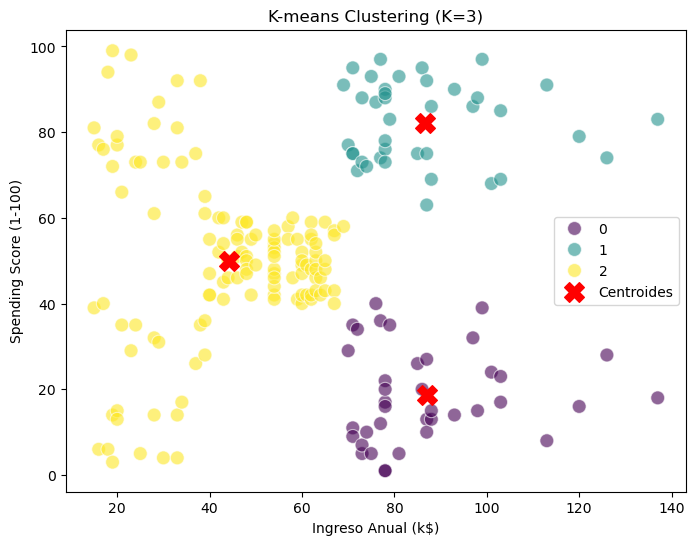

c:\Users\user\.conda\envs\bootcamp_mitic\Lib\site-packages\sklearn\cluster\_kmeans.py:1429: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


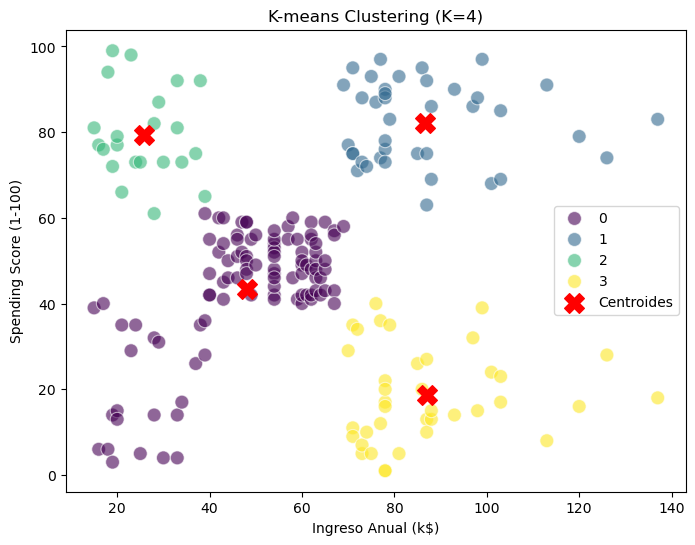

c:\Users\user\.conda\envs\bootcamp_mitic\Lib\site-packages\sklearn\cluster\_kmeans.py:1429: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


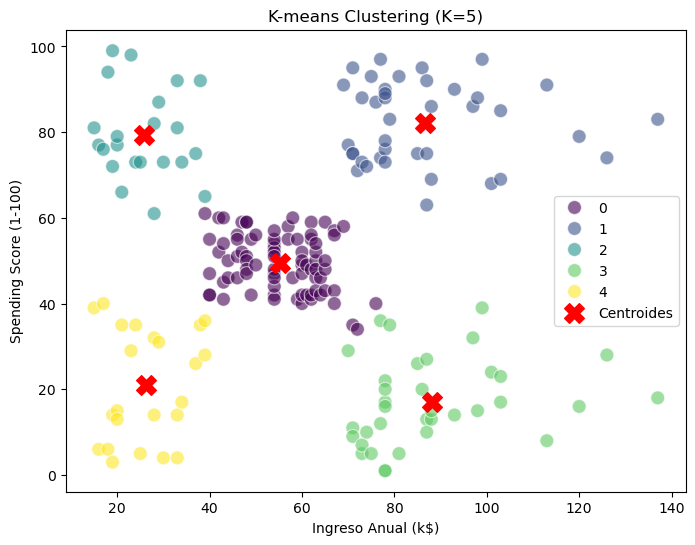

In [15]:
import os
os.environ["OMP_NUM_THREADS"] = "1"

from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np


# Selección de las variables para el análisis de clustering
X = df[['Annual Income (k$)', 'Spending Score (1-100)']]

# Función para aplicar K-means y visualizar los resultados
def aplicar_kmeans(k, X):
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(X)
    
    # Asignar los clusters al dataframe original
    df[f'Cluster_{k}'] = kmeans.labels_
    
    # Centroides de los clusters
    centroids = kmeans.cluster_centers_

    # Visualización de los clusters y los centroides
    plt.figure(figsize=(8, 6))
    sns.scatterplot(x=X['Annual Income (k$)'], y=X['Spending Score (1-100)'], hue=kmeans.labels_, palette='viridis', s=100, alpha=0.6)
    plt.scatter(centroids[:, 0], centroids[:, 1], s=200, c='red', marker='X', label='Centroides')
    plt.title(f'K-means Clustering (K={k})')
    plt.xlabel('Ingreso Anual (k$)')
    plt.ylabel('Spending Score (1-100)')
    plt.legend()
    plt.show()

# Aplicar K-means con diferentes valores de K (por ejemplo, K = 3, 4, 5)
for k in [3, 4, 5]:
    aplicar_kmeans(k, X)


In [16]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans


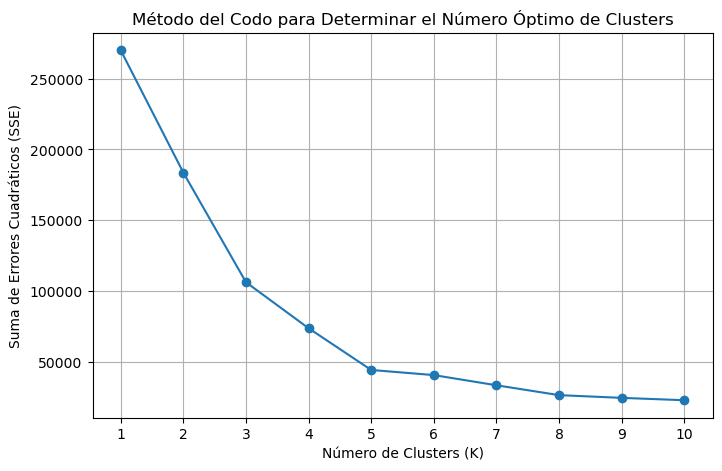

In [21]:
# Importación de bibliotecas necesarias
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
import pandas as pd

import warnings
warnings.filterwarnings("ignore", category=UserWarning, message="KMeans is known to have a memory leak")


# Selecciona las dos columnas relevantes para el clustering
X = df[['Annual Income (k$)', 'Spending Score (1-100)']].values

# Definir un rango de valores de K (número de clusters)
sse = []
k_range = range(1, 11)  # Probar K entre 1 y 10

# Ejecutar K-means para cada valor de K y calcular el SSE (Suma de Errores Cuadráticos)
for k in k_range:
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(X)
    sse.append(kmeans.inertia_)  # SSE se almacena en la propiedad 'inertia_'

# Graficar el método del codo
plt.figure(figsize=(8, 5))
plt.plot(k_range, sse, marker='o')
plt.title("Método del Codo para Determinar el Número Óptimo de Clusters")
plt.xlabel("Número de Clusters (K)")
plt.ylabel("Suma de Errores Cuadráticos (SSE)")
plt.xticks(k_range)
plt.grid(True)
plt.show()


**Observacion:**
* El gráfico del método del codo sugiere que el número óptimo de clusters para este conjunto de datos está entre 4 y 5, ya que más allá de este punto, el beneficio de agregar más clusters es marginal.

K: 1, SSE: 269981.28
K: 2, SSE: 183653.3289473684
K: 3, SSE: 106348.37306211119
K: 4, SSE: 73880.64496247195
K: 5, SSE: 44448.45544793371
K: 6, SSE: 40825.16946386946
K: 7, SSE: 33642.579220779226
K: 8, SSE: 26686.83778518778
K: 9, SSE: 24766.471609793443
K: 10, SSE: 23103.122085983916


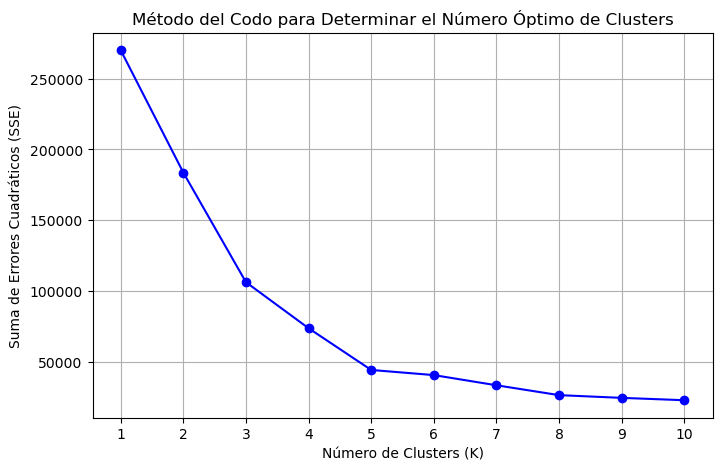

In [22]:
# Imprimir los valores de k_range y sse
for k, sse_value in zip(k_range, sse):
    print(f"K: {k}, SSE: {sse_value}")

# Graficar el método del codo
plt.figure(figsize=(8, 5))
plt.plot(k_range, sse, marker='o', color='b')
plt.title("Método del Codo para Determinar el Número Óptimo de Clusters")
plt.xlabel("Número de Clusters (K)")
plt.ylabel("Suma de Errores Cuadráticos (SSE)")
plt.xticks(k_range)
plt.grid(True)
plt.show()


**Interpretación de Clusters:**
* Una vez obtenidos los clusters, analiza cada grupo. ¿Qué características tienen en común los clientes de cada cluster? ¿Cómo podrías usar esta información para diseñar estrategias de marketing personalizadas?

**Cargar datos y realizar K-means**

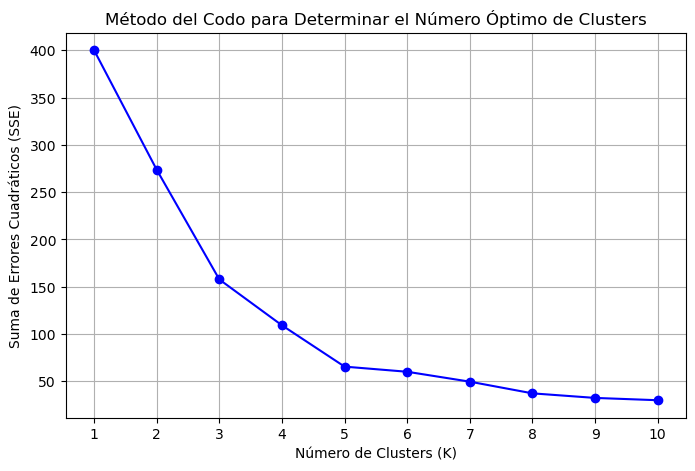

In [24]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler

# Cargar datos (asegúrate de tener las columnas 'Annual Income' y 'Spending Score')
data = pd.read_csv("../data/Mall_Customers.csv")  # Reemplaza con tu archivo de datos

# Seleccionamos las columnas relevantes
X = data[['Annual Income (k$)', 'Spending Score (1-100)']]

# Normalizar los datos
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Aplicar K-means para diferentes valores de K
k_range = range(1, 11)
sse = []

for k in k_range:
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(X_scaled)
    sse.append(kmeans.inertia_)  # Inercia = SSE

# Graficar el método del codo
plt.figure(figsize=(8, 5))
plt.plot(k_range, sse, marker='o', color='b')
plt.title("Método del Codo para Determinar el Número Óptimo de Clusters")
plt.xlabel("Número de Clusters (K)")
plt.ylabel("Suma de Errores Cuadráticos (SSE)")
plt.xticks(k_range)
plt.grid(True)
plt.show()

# Elegir el valor de K (por ejemplo, K=4, basado en el gráfico del codo)
kmeans = KMeans(n_clusters=4, random_state=42)
data['Cluster'] = kmeans.fit_predict(X_scaled)


**Análisis de los Clusters**

   Cluster  Annual Income (k$)  Spending Score (1-100)
0        0           48.168317               43.396040
1        1           86.538462               82.128205
2        2           25.727273               79.363636
3        3           87.000000               18.631579


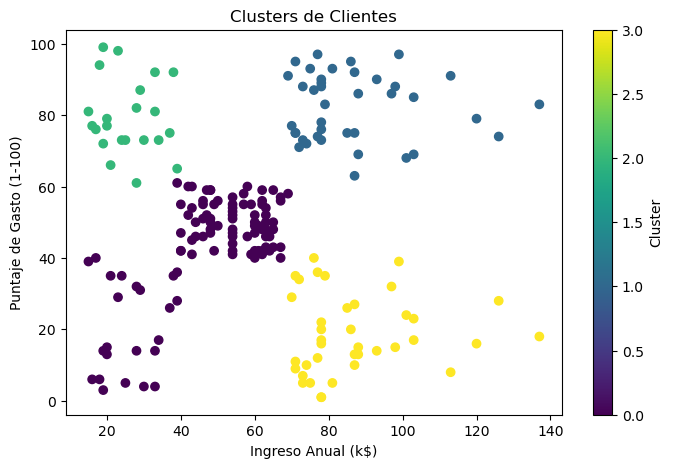

In [25]:
# Calcular las medias de las variables por cluster
cluster_summary = data.groupby('Cluster').agg({
    'Annual Income (k$)': 'mean',
    'Spending Score (1-100)': 'mean'
}).reset_index()

# Mostrar las medias para cada cluster
print(cluster_summary)

# Visualizar los clusters en un gráfico de dispersión
plt.figure(figsize=(8, 5))
plt.scatter(data['Annual Income (k$)'], data['Spending Score (1-100)'], c=data['Cluster'], cmap='viridis')
plt.title('Clusters de Clientes')
plt.xlabel('Ingreso Anual (k$)')
plt.ylabel('Puntaje de Gasto (1-100)')
plt.colorbar(label='Cluster')
plt.show()


**Descripcion:**

El gráfico muestra cómo se agrupan los clientes según su Ingreso Anual y su Puntaje de Gasto. Los clientes están organizados en 4 grupos (clusters), y aquí te doy un resumen de cada uno:

* **Cluster 0:**

Ingreso: 48.17k$
Gasto: 43.40
Son clientes con ingresos bajos y un gasto moderado. No gastan tanto, pero están por encima de los que tienen menores ingresos.

* **Cluster 1:**

Ingreso: 86.54k$
Gasto: 82.13
Este grupo tiene buenos ingresos y gasta mucho. Son clientes ideales para productos exclusivos y de lujo.

* **Cluster 2:**

Ingreso: 25.73k$
Gasto: 79.36
A pesar de tener ingresos bajos, gastan bastante. Podrían ser más receptivos a promociones y descuentos, ya que gastan más de lo que ganan.

* **Cluster 3:**

Ingreso: 87.00k$
Gasto: 18.63
Aunque tienen buenos ingresos, su gasto es bajo. Prefieren ahorrar y gastar estratégicamente, por lo que las ofertas de valor podrían atraerlos más.
En resumen, los clusters 1 y 3 tienen buenos ingresos, pero cluster 1 gasta mucho mientras que cluster 3 gasta poco. Los clusters 0 y 2 tienen menos ingresos, pero cluster 2 gasta más intensamente.

In [26]:
# Análisis de cada cluster
for idx, row in cluster_summary.iterrows():
    print(f"Cluster {row['Cluster']}:")
    print(f"  Ingreso Anual Promedio: {row['Annual Income (k$)']}k$")
    print(f"  Puntaje de Gasto Promedio: {row['Spending Score (1-100)']}")
    
    # Estrategias de marketing basadas en el perfil del cluster
    if row['Annual Income (k$)'] < 40 and row['Spending Score (1-100)'] < 50:
        print("  Estrategia: Ofrecer descuentos, productos económicos y promociones de ahorro.\n")
    elif row['Annual Income (k$)'] >= 70 and row['Spending Score (1-100)'] > 60:
        print("  Estrategia: Ofrecer productos de lujo y exclusividad, programas de fidelización.\n")
    elif row['Annual Income (k$)'] < 70 and row['Spending Score (1-100)'] < 60:
        print("  Estrategia: Ofrecer productos de gama media, pagos a plazos, y promociones de temporada.\n")


Cluster 0.0:
  Ingreso Anual Promedio: 48.16831683168317k$
  Puntaje de Gasto Promedio: 43.396039603960396
  Estrategia: Ofrecer productos de gama media, pagos a plazos, y promociones de temporada.

Cluster 1.0:
  Ingreso Anual Promedio: 86.53846153846153k$
  Puntaje de Gasto Promedio: 82.12820512820512
  Estrategia: Ofrecer productos de lujo y exclusividad, programas de fidelización.

Cluster 2.0:
  Ingreso Anual Promedio: 25.727272727272727k$
  Puntaje de Gasto Promedio: 79.36363636363636
Cluster 3.0:
  Ingreso Anual Promedio: 87.0k$
  Puntaje de Gasto Promedio: 18.63157894736842


# Análisis de Resultados

A partir de los datos obtenidos de las variables **Ingreso Anual** y **Puntaje de Gasto**, podemos extraer varios insights y patrones que pueden ayudar a identificar comportamientos comunes entre los grupos de clientes.

## Rango de Ingreso Anual:
- Los ingresos anuales de los clientes varían significativamente, desde los más bajos con **15k$** hasta los más altos con **137k$**.
- La **media** de **60.56k$** sugiere que la mayoría de los clientes tienen ingresos moderados o altos. Esto podría indicar que la base de clientes está formada tanto por clientes de alto poder adquisitivo como por otros con un perfil económico más diverso.

## Puntaje de Gasto:
- Los puntajes de gasto tienen una distribución más dispersa, con una **media** de **50.20** y un rango de **1 a 99**.
- Esto implica que, aunque hay clientes con puntajes bajos (cerca de 1), también existe un segmento considerable con un **alto nivel de gasto** (alrededor de 99). Este comportamiento refleja que algunos clientes gastan más que lo que su ingreso anual permitiría, mientras que otros son más conservadores en su gasto.

## Patrones de Gasto vs. Ingreso:
- Existe una clara relación entre los **ingresos** y el **puntaje de gasto**. 
  - Los clientes con **mayores ingresos** (por encima de **78k$**) tienden a tener un **puntaje de gasto más bajo**.
  - Los clientes con **ingresos bajos** (por debajo de **41k$**) tienen un **puntaje de gasto relativamente más alto**.
  
Esto podría reflejar un comportamiento donde los clientes con altos ingresos prefieren ahorrar o gastar de manera más controlada, mientras que los de menor poder adquisitivo tienden a gastar más intensamente, especialmente si son impulsados por promociones.

## Oportunidades para Marketing:
- **Clientes de ingresos altos y gasto bajo**: Este grupo podría estar buscando **productos de lujo** o **promociones que resalten el valor a largo plazo**, como descuentos en productos premium o exclusivas ofertas de fidelidad.
- **Clientes de ingresos bajos y gasto alto**: Este segmento podría responder bien a **estrategias que ofrezcan descuentos y promociones atractivas**, o incluso productos de bajo costo que representen un alto valor percibido.

## Conclusión:
Los datos muestran una segmentación clara entre aquellos que tienen **altos ingresos pero un bajo nivel de gasto**, y aquellos con **bajos ingresos pero un mayor puntaje de gasto**. Esto puede ayudar a **orientar mejor las estrategias de marketing**, al identificar qué tipo de productos o servicios podrían interesar más a cada grupo y cómo diseñar ofertas que se alineen con sus comportamientos de compra.


# Expansión del Algoritmo y Aplicaciones

El **algoritmo K-means** tiene una amplia gama de aplicaciones en diversas industrias. Algunos ejemplos incluyen:

### Segmentación de Clientes
El K-means se utiliza frecuentemente para agrupar a los clientes según su comportamiento de compra o interacción con un producto. Esto permite a las empresas diseñar **estrategias de marketing personalizadas** y **ofertas específicas** para cada segmento, optimizando la relación con sus clientes.

### Compresión de Imágenes
En el ámbito de procesamiento de imágenes, el algoritmo puede ser utilizado para **reducir el número de colores** en una imagen. Esto se logra agrupando píxeles similares en un número reducido de colores representativos, lo que reduce el tamaño del archivo sin perder mucha calidad visual.

### Agrupación de Documentos
K-means también es útil para **clasificar documentos** en función de su similitud textual. Esto se aplica en el análisis de grandes volúmenes de texto, como en motores de búsqueda o sistemas de recomendación, donde los documentos se agrupan en categorías relevantes según su contenido.

## Otras Aplicaciones del K-means:
- **Biología**: En la biología molecular, K-means puede usarse para **clasificar genes** según sus características de expresión o para **analizar secuencias de ADN**.
- **Procesamiento de Señales**: En la ingeniería, este algoritmo se aplica para **analizar señales** y **separar diferentes fuentes de información**.
- **Detección de Anomalías**: El K-means también puede ser usado para identificar **anomalías** en grandes conjuntos de datos, como en el caso de **fraude bancario** o **fallos en sistemas industriales**.

Aunque en esta actividad el enfoque está en la **segmentación de clientes para un centro comercial**, el mismo algoritmo puede aplicarse a una variedad de dominios como la biología, el procesamiento de señales y la detección de anomalías, lo que demuestra su versatilidad y potencial.
